# POSTTEST 6
**NAMA  : DUTA VIRA PRADHANA DIPA**

**NIM   : 2009106053**

Import Library

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dts
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder

Membaca database

In [29]:
df = pd.read_csv("Dataset/heart disease classification dataset.csv")
df.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


## Clustering

Membuat objek dari K-Means dengan jumlah cluster = 3

In [30]:
objek = KMeans(n_clusters=3)

Encoding atribut bertipe objek

In [31]:
encoder = OrdinalEncoder()
df['sex'] = encoder.fit_transform(df[['sex']])

Membersihkan atribut bernilai null

In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
df["trestbps"] = imputer.fit_transform(df[["trestbps"]])
df["chol"] = imputer.fit_transform(df[["chol"]])
df["thalach"] = imputer.fit_transform(df[["thalach"]])

Memilih atribut untuk data training

In [33]:
x_data = df[["age", "sex", "cp", "trestbps", "chol", "fbs", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]]

Melakukan fit terhadap objek

In [34]:
objek.fit(x_data)

KMeans(n_clusters=3)

Menentukan label untuk cluster

In [35]:
labels = objek.labels_
print(labels)

[0 0 1 0 2 1 2 0 1 1 0 0 0 1 0 1 2 0 0 0 0 0 1 0 1 2 1 1 2 1 1 1 1 0 1 1 2
 0 0 2 2 0 1 0 2 2 0 0 1 0 0 2 0 1 0 1 1 0 1 2 0 2 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 0 1 1 0 0 2 2 2 0 2 0 1 1 0 0 1 1 0 1 0 2 0 2 0 0 0 1 0 1 1 0 0 0 0 2
 1 2 1 0 1 1 1 1 0 2 0 0 0 1 1 1 0 1 0 1 0 2 0 2 0 1 1 1 0 2 2 1 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 1 0 2 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 2 1 0 2 0 2 0 0
 0 0 0 0 1 2 1 1 0 1 2 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 2 0 2 0 2 0 0 2 1
 0 0 0 1 0 1 0 2 0 0 0 0 2 2 2 2 2 0 0 0 1 0 1 0 2 0 0 0 2 0 2 2 0 2 0 1 0
 1 0 0 0 0 1 1 2 1 0 0 0 0 0 0 0 1 1 0 2 1 2 1 1 1 1 2 1 0 2 1 1 2 0 1 1 1
 1 1 0 0 1 1 0]


## Evaluasi Hasil Pemodelan

Membuat dataframe dengan label dan target sebagai kolom 

In [36]:
df_KMeans = pd.DataFrame({'labels': labels, 'Target': df['target']})

Membuat Crosstab

In [37]:
crosstab = pd.crosstab(df_KMeans["labels"], df_KMeans["Target"])
print(crosstab)

Target  no  yes
labels         
0       70   68
1       42   70
2       26   27


## Menampilkan Centroid

Membuat array demgan mengambil semua baris pada kolom tertentu

In [38]:
X = x_data['trestbps']
Y = x_data['chol']

Menampung koordinat setiap centroid

In [39]:
centroid = objek.cluster_centers_
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

Visualisasi Cluster

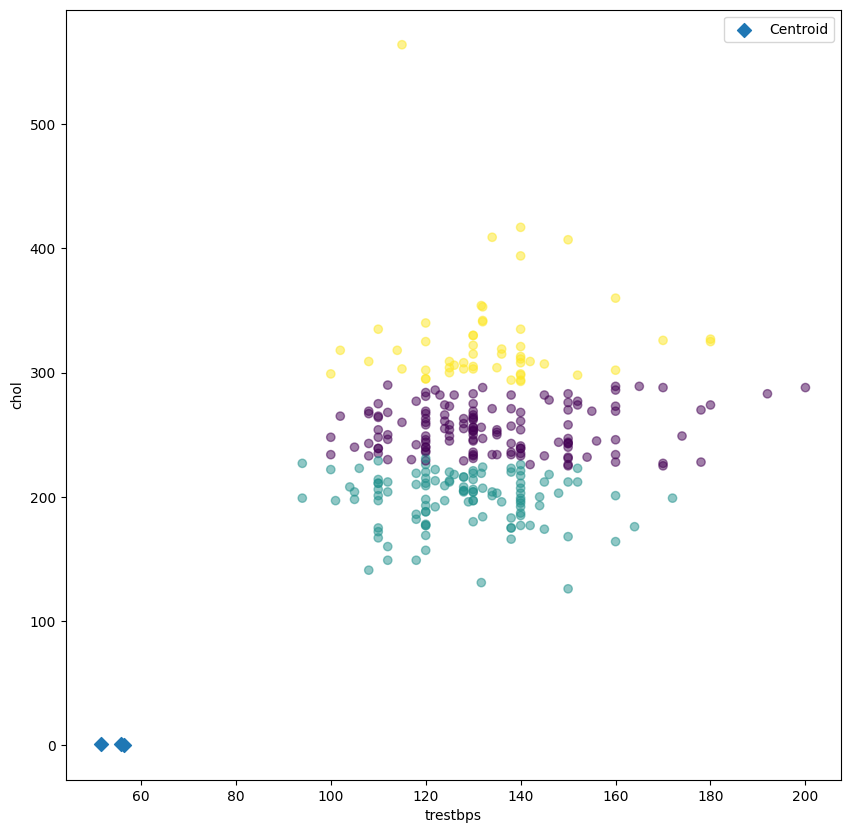

In [40]:
plt.figure(figsize = (10,10))
plt.scatter(X, Y, alpha = 0.5, c = labels)
plt.scatter(centroid_X, centroid_Y, marker="D", s=50, label="Centroid")
plt.xlabel("trestbps")
plt.ylabel("chol")
plt.legend()
plt.show()

## Menentukan Jumlah Cluster denga Metode Elbow

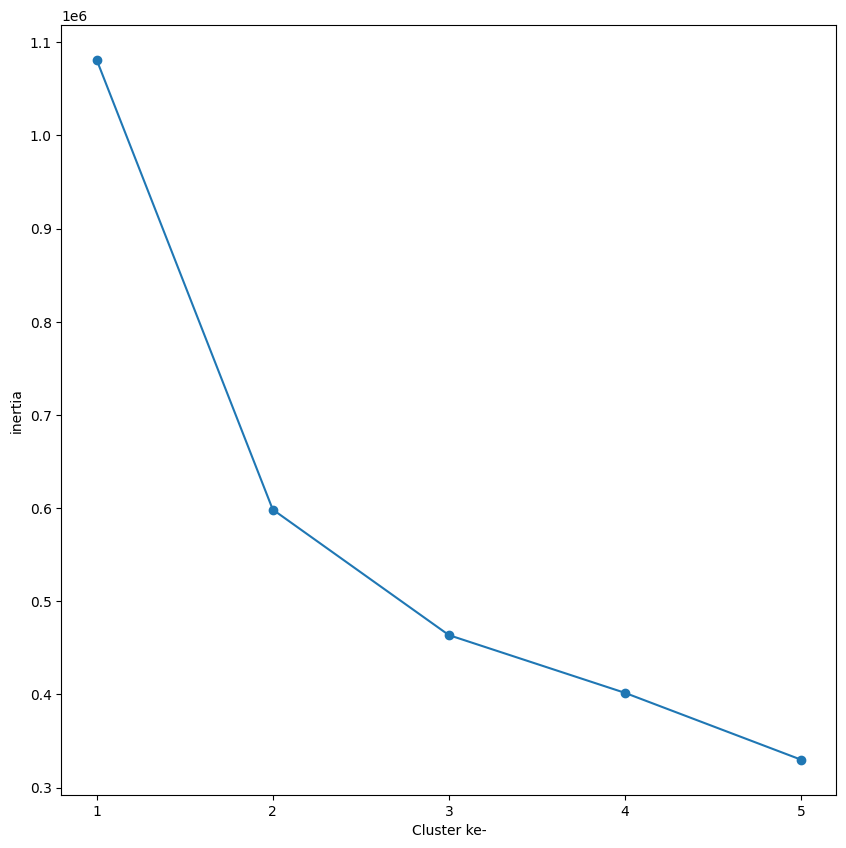

In [41]:
jarak = range(1, 6)
inertias = []
for k in jarak:
    objek = KMeans(n_clusters=k)
    objek.fit(x_data)
    inertias.append(objek.inertia_)

plt.figure(figsize=(10,10))
plt.plot(jarak, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('inertia')
plt.xticks(jarak)
plt.show()